# 最小二乘法原理

根据观测数据 $\{(x_i, y_i),\ i = 1, 2, \cdots, n\}$，求拟合直线 $y = \alpha + \beta x$，使 $E(\alpha, \beta) = \sum_{i=1}^n(\alpha + \beta x_i - y_i)^2$ 取最小值。

令 $\frac{\partial E}{\partial \alpha}=0, \frac{\partial E}{\partial \beta}=0$，

$$
\left\{
\begin{array}{ll}
\sum_{i=1}^n(\alpha+\beta x_i-y_i)&=0\\
\sum_{i=1}^n(\alpha+\beta x_i-y_i)x_i&=0\\
\end{array}
\right.
$$

写成矩阵形式，

$$
A X = b
$$

式中，

$$
A=
\begin{bmatrix}
  a_{11} & a_{12}\\
  a_{21} & a_{22}\\
\end{bmatrix},
X=
\begin{bmatrix}
  \alpha\\
  \beta\\
\end{bmatrix},
b=
\begin{bmatrix}
  b_1\\
  b_2\\
\end{bmatrix}
$$

其中，$a_{11}=n$, $a_{12}=a_{21}=\sum_{i=1}^nx_i$，$a_{22}=\sum_{i=1}^nx_i^2$，$b_1=\sum_{i=1}^ny_i$，$b_2=\sum_{i=1}^nx_iy_i$

解得

$$
\beta=\frac{a_{11}b_2-a_{12}b_1}{a_{11}a_{22}-a_{12}^2},\alpha=\frac{b_1-a_{12}\beta}{a_{11}}
$$



**一般形式**

考虑超定方程组（超定指未知数小于方程个数）

$$
\sum_{j=1}^nx_{ij}\beta_j=y_i,\quad i=1,2,3,\cdots,m
$$

其中， $m$ 代表样本数，$n$ 代表参数维度，写成矩阵形式 $X\beta=Y$

$$
X=\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1n}\\
x_{21} & x_{22} & \cdots & x_{2n}\\
\vdots & \vdots & & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}\\
\end{bmatrix},\quad \beta=\begin{bmatrix}\beta_1\\\beta_2\\\vdots\\\beta_n\end{bmatrix},\quad Y=\begin{bmatrix}y_1\\y_2\\\vdots\\ y_m\end{bmatrix}
$$

为得到 $\beta$ 的最佳估计 $\hat \beta$ ，将问题转化为如下的最值问题：

$$
\min E(\beta)=\min
\begin{Vmatrix}X\beta-Y\end{Vmatrix}^2
$$

通过微分求最值，得

$$
(X^TX)\beta=X^TY
$$

若 $X^TX$ 为非奇异矩阵，则 $\beta$ 有唯一解。

$$
\hat\beta=(X^TX)^{-1}X^TY
$$

可以看出，求解最小二乘问题的关键是构造方程组。`numpy` 库中的 `numpy.linalg.solve` 可用于求解形如 $AX=b$ 的方程组，`numpy.linalg.lstsq` 是解超定方程组 $X\beta=Y$ 的最小二乘法程序。`scipy` 库的 `scipy.linalg.lstsq` 也是最小二乘法。



**例**

一次模拟实验中，输入 $t$（自变量）为

`(0.00, 0.30, 0.60, 0.90, 1.08, 1.20, 1.30, 1.48, 1.60, 1.70, 1.78, 1.85, 1.90, 1.95, 2.00)`，
 
观测到的输出 $y$（因变量）为 
 
`(1.78, 1.91, 2.01, 2.12, 2.20, 2.22, 2.25, 2.32, 2.38, 2.41, 2.43, 2.47, 2.49, 2.48, 2.51)`。
 
根据实验分析，$y$ 与 $t$ 成线性关系，试确定关系表达式。

以下为 Python 程序，其中 `numpy.array.T`将矩阵转置，`matplotlib` 库的 `matplotlib.pyplot` 模块用于绘制图形。

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# 导入 numpy 与 matplotlib 库

# 控制小数的显示精度
np.set_printoptions(precision=4)

# 将原始数据转化为 numpy 的 array 数组
t = np.array([0.00, 0.30, 0.60, 0.90, 1.08, 1.20, 1.30,
             1.48, 1.60, 1.70, 1.78, 1.85, 1.90, 1.95, 2.00])
y = np.array([1.78, 1.91, 2.01, 2.12, 2.20, 2.22, 2.25,
             2.32, 2.38, 2.41, 2.43, 2.47, 2.49, 2.48, 2.51])

# 形成方程组
X = np.array([np.ones(len(t)), t]).T
A = np.dot(X.T, X)
b = np.dot(X.T, y)


按公式计算：

In [2]:
beta = np.zeros(2)

# 求解方程组
beta[1] = (A[0,0]*b[1] - A[0,1]*b[0]) / (A[0,0]*A[1,1] - A[0,1]*A[0,1])
beta[0] = (b[0] - A[0,1]*beta[1]) / A[0,0]

显示计算结果并绘制图形

beta = [1.7924 0.3612] residuals = 0.0014


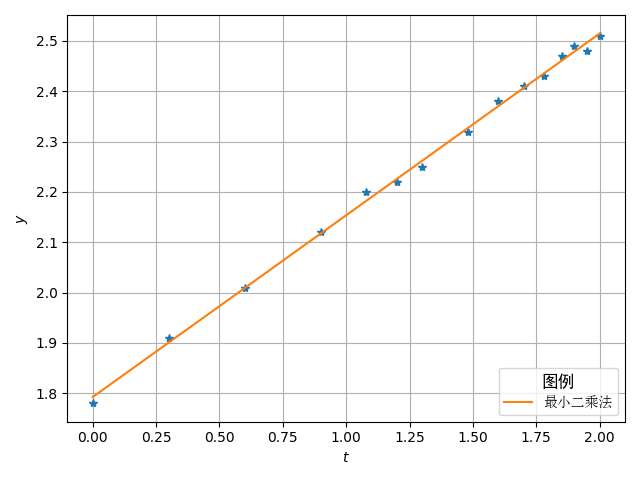

In [3]:
# 显示计算结果与误差
print("beta =", beta, "residuals =",
      "{:.4f}".format(sum((beta[0] + beta[1]*t - y)**2)))

# 绘制图形
plt.plot(t, y, "*")
plt.plot(t, beta[0]+beta[1]*t, "-", label="最小二乘法")
plt.xlabel(r"$t$")
plt.ylabel(r"$y$")

plt.legend(
    prop={'family': 'Simsun', 'size': 10}, handlelength=2,
    loc=4, title="图例",
    title_fontproperties={'family': 'SimHei', 'size': 12})

plt.grid(True)
plt.tight_layout()

fig = plt.gcf()  # 获取当前图片, 用 fig.savefig("out.png") 保存

plt.show()


可以将图形保存为文件

In [4]:
# 保持图形，可用格式：png, pdf, svg 等
fig.savefig("fig2-1.png")

也可调用 `np.linalg.solve` 求解

In [5]:
# 求解方程组，beta 返回解
beta = np.linalg.solve(A, b)

# 显示计算结果与误差
print("beta =", beta, "residuals =",
      "{:.4f}".format(sum((beta[0] + beta[1]*t - y)**2)))


beta = [1.7924 0.3612] residuals = 0.0014


也可调用 `np.linalg.lstsq` 求解，参数可参考在线帮助文档。


In [6]:
# 形成系数
X = np.vstack([np.ones(len(t)), t]).T

# 调用 np.linalg.lstsq
beta = np.linalg.lstsq(X, y, rcond=None)

# 显示计算结果与误差
print("beta =", beta[0], "residuals =", "{:.4f}".format(beta[1][0]))


beta = [1.7924 0.3612] residuals = 0.0014
